In [123]:
import numpy as np
import pandas as pd
import re
import matplotlib.pyplot as plt

In [124]:
# pd.set_option('display.max_colwidth', None)
# pd.set_option('display.max_rows', None)
pd.set_option('display.max_columns', None)

In [125]:
df = pd.read_csv("datasets\Gurgaon\Flats\properties_cleaned_v1.csv")
df.head()

,property_type,society,sector,price,price_per_sqft,area,areaWithType,bedRoom,bathroom,balcony,additionalRoom,floor_num,facing,agePossession,nearbyLocations,furnishDetails,features
0,house,malibu towne,sector 47,8.50,53125.0,1600.0,Built Up area: 1600 (148.64 sq.m.),12,12,3+,not available,4.0,North,0 to 1 Year Old,"['Standard chartered ATM', 'Icici bank ATM', '...","['12 Wardrobe', '12 Fan', '1 Exhaust Fan', '10...","['Feng Shui / Vaastu Compliant', 'Private Gard..."
1,house,international city by sobha phase 1,sector 109,12.00,20000.0,6000.0,Plot area 8000(743.22 sq.m.)Built Up area: 700...,5,6,3,"study room,servant room",2.0,North-East,1 to 5 Year Old,"['Dwarka sector 21 metro station', 'Pacific D2...","['5 Wardrobe', '10 Fan', '1 Exhaust Fan', '2 G...","['Security / Fire Alarm', 'Feng Shui / Vaastu ..."
2,flat,shapoorji pallonji joyville gurugram,sector 102,1.28,10534.0,1215.0,Super Built up area 1215(112.88 sq.m.),2,2,3,not available,10.0,East,1 to 5 Year Old,"['Khan Market', 'The Esplanade Mall', 'Dwarka ...",NaN,"['Feng Shui / Vaastu Compliant', 'Security / F..."
3,flat,conscient habitat,sector 99a,0.27,5599.0,482.0,Carpet area: 484 (44.97 sq.m.),2,2,1,others,8.0,South-West,1 to 5 Year Old,NaN,NaN,"['Feng Shui / Vaastu Compliant', 'Security / F..."
4,flat,gls arawali homes,sohna road,0.32,6722.0,476.0,Built Up area: 476 (44.22 sq.m.),2,1,0,not available,0.0,NaN,undefined,"['Huda City Centre', 'Golf Course Road', 'Delh...","['1 Light', 'No AC', 'No Bed', 'No Chimney', '...",NaN


In [126]:
df.duplicated().sum()

122

In [127]:
# problems with data ==================
"""
society = 1181,1828
"""
df.loc[[1181,1828],:]

,property_type,society,sector,price,price_per_sqft,area,areaWithType,bedRoom,bathroom,balcony,additionalRoom,floor_num,facing,agePossession,nearbyLocations,furnishDetails,features
1181,flat,NaN,sector 78,0.6,3692.0,1625.0,Built Up area: 1625 (150.97 sq.m.),2,2,0,not available,NaN,NaN,Under Construction,NaN,[],NaN
1828,flat,.,gwal pahari,7.0,11000.0,6364.0,Super Built up area 6000(557.42 sq.m.),4,4,3+,servant room,6.0,South-West,1 to 5 Year Old,"['HANUMAN MANDIR', 'SHIV MANDIR BALIYAWAS', 'I...",[],"['Security / Fire Alarm', 'Intercom Facility',..."


In [128]:
df.shape

(3803, 17)

In [129]:
df.floor_num.isnull().sum()

19

In [130]:
df.isnull().sum()

property_type         0
society               1
sector                0
price                18
price_per_sqft       18
area                 18
areaWithType          0
bedRoom               0
bathroom              0
balcony               0
additionalRoom        0
floor_num            19
facing             1105
agePossession         1
nearbyLocations     177
furnishDetails      981
features            635
dtype: int64

## areaWithType column

In [131]:
df.sample(8)[["price","area","areaWithType"]]

,price,area,areaWithType
2182,0.70,1700.0,Plot area 1700(157.94 sq.m.)
1301,2.25,1332.0,Built Up area: 148 (123.75 sq.m.)
3554,1.52,1650.0,Super Built up area 1650(153.29 sq.m.)Carpet a...
389,0.53,1104.0,Super Built up area 1095(101.73 sq.m.)
1916,1.60,1848.0,Super Built up area 1848(171.68 sq.m.)Built Up...
1845,4.00,981.0,Plot area 109(91.14 sq.m.)
2097,1.85,1818.0,Super Built up area 1818(168.9 sq.m.)Carpet ar...
3365,1.75,1574.0,Super Built up area 2724(253.07 sq.m.)Carpet a...


In [132]:
text = "Super Built up area 3360(312.15 sq.m.)"
text1 = "Carpet area: 1180 (109.63 sq.m.)"
text2 = "Super Built up area 1326(123.19 sq.m.) Built Up area: 1298 sq.ft. (120.59 sq.m.)Carpet area: 1050 sq.ft. (97.55 sq.m.)"

match = re.search(r"Super Built up area (\d+\.?\d*)\s*\((\d+\.?\d*) sq.m.\)",text2)
print(match)
print(float(match.group(2)))

type = "Carpet area"
match = re.search(type + r"\s*:\s*(\d+\.?\d*)", text2)

print(match)
print(float(match.group(1)))

<re.Match object; span=(0, 38), match='Super Built up area 1326(123.19 sq.m.)'>
123.19
<re.Match object; span=(80, 97), match='Carpet area: 1050'>
1050.0


In [133]:
area_value = "1215"
text2 = "Super Built up area 1215(112.88 sq.m.)"
match = re.search(r'{} \((\d+\.?\d*) sq.m.\)'.format(area_value), text2)
print(match)
if match:
    print(match.group(1))
else:
    print(area_value)

None
1215


In [134]:
# extracts super buildup area
def get_super_builtup_area(text):
    match = re.search(r"Super Built up area (\d+\.?\d*)",text)
    if match:
        return float(match.group(1))
    return None

In [135]:
# extract Built Up area and plot carpet area
def get_area(text, type):
    match = re.search(type + r"\s*:\s*(\d+\.?\d*)", text)
    if match:
        return float(match.group(1))
    return None

In [136]:
# check if the area in sqm and convert it to sqft
def convert_to_sqft(text, area_value):
    if area_value is None:
        return None
    match = re.search(r'{} \((\d+\.?\d*) sq.m.\)'.format(area_value), text)
    if match:
        sq_m_value = float(match.group(1))
        return sq_m_value * 10.7639  # conversion factor from sq.m. to sqft
    return area_value

In [137]:
# Extract Super Built up area and convert to sqft if needed
df['super_built_up_area'] = df["areaWithType"].apply(get_super_builtup_area)
df['super_built_up_area'] = df.apply(lambda x: convert_to_sqft(x['areaWithType'], x['super_built_up_area']), axis=1)

# Extract Built Up area and convert to sqft if needed
df['built_up_area'] = df['areaWithType'].apply(lambda x: get_area(x, 'Built Up area'))
df['built_up_area'] = df.apply(lambda x: convert_to_sqft(x['areaWithType'], x['built_up_area']), axis=1)

# Extract Carpet area and convert to sqft if needed
df['carpet_area'] = df['areaWithType'].apply(lambda x: get_area(x, 'Carpet area'))
df['carpet_area'] = df.apply(lambda x: convert_to_sqft(x['areaWithType'], x['carpet_area']), axis=1)

In [138]:
df[["price","property_type","area","areaWithType","super_built_up_area","built_up_area","carpet_area"]].sample(4)

,price,property_type,area,areaWithType,super_built_up_area,built_up_area,carpet_area
2688,1.43,flat,1582.0,Super Built up area 1578(146.6 sq.m.),1578.0,NaN,NaN
1199,0.85,flat,1252.0,Super Built up area 1252(116.31 sq.m.),1252.0,NaN,NaN
2013,9.00,house,4235.0,Plot area 5605(520.72 sq.m.)Built Up area: 520...,NaN,5200.0,4235.0
2074,0.97,flat,1050.0,Carpet area: 1050 (97.55 sq.m.),NaN,NaN,1050.0


In [139]:
df.duplicated().sum()

122

In [140]:
df[~((df['super_built_up_area'].isnull()) | (df['built_up_area'].isnull()) | (df['carpet_area'].isnull()))] \
[['price','property_type','area','areaWithType','super_built_up_area','built_up_area','carpet_area']].shape

(534, 7)

In [141]:
df[df.areaWithType.str.contains("Plot")][['price','property_type','area','areaWithType','super_built_up_area', \
                        'built_up_area','carpet_area']]

,price,property_type,area,areaWithType,super_built_up_area,built_up_area,carpet_area
1,12.00,house,6000.0,Plot area 8000(743.22 sq.m.)Built Up area: 700...,NaN,7000.0,6000.0
34,2.95,house,1845.0,Plot area 205(171.41 sq.m.),NaN,NaN,NaN
39,3.10,house,1548.0,Plot area 172(143.81 sq.m.),NaN,NaN,NaN
49,6.00,house,6228.0,Plot area 692(578.6 sq.m.),NaN,NaN,NaN
55,2.25,house,900.0,Plot area 100(83.61 sq.m.),NaN,NaN,NaN
...,...,...,...,...,...,...,...
3774,0.67,house,783.0,Plot area 87(72.74 sq.m.),NaN,NaN,NaN
3783,0.27,house,225.0,Plot area 225(20.9 sq.m.),NaN,NaN,NaN
3787,4.35,house,1350.0,Plot area 150(125.42 sq.m.),NaN,NaN,NaN
3793,5.75,house,3500.0,Plot area 272(25.27 sq.m.)Built Up area: 4800 ...,NaN,4800.0,3500.0


In [142]:
df.isnull().sum()

property_type             0
society                   1
sector                    0
price                    18
price_per_sqft           18
area                     18
areaWithType              0
bedRoom                   0
bathroom                  0
balcony                   0
additionalRoom            0
floor_num                19
facing                 1105
agePossession             1
nearbyLocations         177
furnishDetails          981
features                635
super_built_up_area    1888
built_up_area          2616
carpet_area            1859
dtype: int64

In [143]:
all_nan_df = df[((df['super_built_up_area'].isnull()) & (df['built_up_area'].isnull()) & (df['carpet_area'].isnull()))] \
[['price','property_type','area','areaWithType','super_built_up_area','built_up_area','carpet_area']]

all_nan_df.head()

,price,property_type,area,areaWithType,super_built_up_area,built_up_area,carpet_area
34,2.95,house,1845.0,Plot area 205(171.41 sq.m.),NaN,NaN,NaN
39,3.10,house,1548.0,Plot area 172(143.81 sq.m.),NaN,NaN,NaN
49,6.00,house,6228.0,Plot area 692(578.6 sq.m.),NaN,NaN,NaN
55,2.25,house,900.0,Plot area 100(83.61 sq.m.),NaN,NaN,NaN
58,3.75,house,1467.0,Plot area 163(136.29 sq.m.),NaN,NaN,NaN


In [144]:
all_nan_index = df[((df['super_built_up_area'].isnull()) & (df['built_up_area'].isnull()) & (df['carpet_area'].isnull()))] \
[['price','property_type','area','areaWithType','super_built_up_area','built_up_area','carpet_area']].index

all_nan_index

Int64Index([  34,   39,   49,   55,   58,   72,   78,   87,   88,   90,
            ...
            3717, 3718, 3719, 3721, 3740, 3752, 3774, 3783, 3787, 3798],
           dtype='int64', length=546)

In [145]:
# extracting plot type from arewithtype column
def extract_plot_type(text):
    match = re.search(r'Plot area (\d+\.?\d*)', text)
    return float(match.group(1) ) if match else None

In [146]:
all_nan_df["built_up_area"] = all_nan_df["areaWithType"].apply(extract_plot_type)

In [147]:
all_nan_df

,price,property_type,area,areaWithType,super_built_up_area,built_up_area,carpet_area
34,2.95,house,1845.0,Plot area 205(171.41 sq.m.),NaN,205.00,NaN
39,3.10,house,1548.0,Plot area 172(143.81 sq.m.),NaN,172.00,NaN
49,6.00,house,6228.0,Plot area 692(578.6 sq.m.),NaN,692.00,NaN
55,2.25,house,900.0,Plot area 100(83.61 sq.m.),NaN,100.00,NaN
58,3.75,house,1467.0,Plot area 163(136.29 sq.m.),NaN,163.00,NaN
...,...,...,...,...,...,...,...
3752,3.25,house,1070.0,Plot area 1069.63(99.37 sq.m.),NaN,1069.63,NaN
3774,0.67,house,783.0,Plot area 87(72.74 sq.m.),NaN,87.00,NaN
3783,0.27,house,225.0,Plot area 225(20.9 sq.m.),NaN,225.00,NaN
3787,4.35,house,1350.0,Plot area 150(125.42 sq.m.),NaN,150.00,NaN


In [148]:
def convert_scale(row):
    if np.isnan(row['area']) or np.isnan(row['built_up_area']):
        return row['built_up_area']
    else:
        if round(row['area']/row['built_up_area']) == 9.0:
            return row['built_up_area'] * 9
        elif round(row['area']/row['built_up_area']) == 11.0:
            return row['built_up_area'] * 10.7
        else:
            return row['built_up_area']

In [149]:
all_nan_df.built_up_area = all_nan_df.apply(convert_scale, axis=1)

In [150]:
all_nan_df

,price,property_type,area,areaWithType,super_built_up_area,built_up_area,carpet_area
34,2.95,house,1845.0,Plot area 205(171.41 sq.m.),NaN,1845.00,NaN
39,3.10,house,1548.0,Plot area 172(143.81 sq.m.),NaN,1548.00,NaN
49,6.00,house,6228.0,Plot area 692(578.6 sq.m.),NaN,6228.00,NaN
55,2.25,house,900.0,Plot area 100(83.61 sq.m.),NaN,900.00,NaN
58,3.75,house,1467.0,Plot area 163(136.29 sq.m.),NaN,1467.00,NaN
...,...,...,...,...,...,...,...
3752,3.25,house,1070.0,Plot area 1069.63(99.37 sq.m.),NaN,1069.63,NaN
3774,0.67,house,783.0,Plot area 87(72.74 sq.m.),NaN,783.00,NaN
3783,0.27,house,225.0,Plot area 225(20.9 sq.m.),NaN,225.00,NaN
3787,4.35,house,1350.0,Plot area 150(125.42 sq.m.),NaN,1350.00,NaN


In [151]:
df.update(all_nan_df)

In [152]:
df.isnull().sum()

property_type             0
society                   1
sector                    0
price                    18
price_per_sqft           18
area                     18
areaWithType              0
bedRoom                   0
bathroom                  0
balcony                   0
additionalRoom            0
floor_num                19
facing                 1105
agePossession             1
nearbyLocations         177
furnishDetails          981
features                635
super_built_up_area    1888
built_up_area          2070
carpet_area            1859
dtype: int64

In [153]:
df.head()

,property_type,society,sector,price,price_per_sqft,area,areaWithType,bedRoom,bathroom,balcony,additionalRoom,floor_num,facing,agePossession,nearbyLocations,furnishDetails,features,super_built_up_area,built_up_area,carpet_area
0,house,malibu towne,sector 47,8.50,53125.0,1600.0,Built Up area: 1600 (148.64 sq.m.),12,12,3+,not available,4.0,North,0 to 1 Year Old,"['Standard chartered ATM', 'Icici bank ATM', '...","['12 Wardrobe', '12 Fan', '1 Exhaust Fan', '10...","['Feng Shui / Vaastu Compliant', 'Private Gard...",NaN,1600.0,NaN
1,house,international city by sobha phase 1,sector 109,12.00,20000.0,6000.0,Plot area 8000(743.22 sq.m.)Built Up area: 700...,5,6,3,"study room,servant room",2.0,North-East,1 to 5 Year Old,"['Dwarka sector 21 metro station', 'Pacific D2...","['5 Wardrobe', '10 Fan', '1 Exhaust Fan', '2 G...","['Security / Fire Alarm', 'Feng Shui / Vaastu ...",NaN,7000.0,6000.0
2,flat,shapoorji pallonji joyville gurugram,sector 102,1.28,10534.0,1215.0,Super Built up area 1215(112.88 sq.m.),2,2,3,not available,10.0,East,1 to 5 Year Old,"['Khan Market', 'The Esplanade Mall', 'Dwarka ...",NaN,"['Feng Shui / Vaastu Compliant', 'Security / F...",1215.0,NaN,NaN
3,flat,conscient habitat,sector 99a,0.27,5599.0,482.0,Carpet area: 484 (44.97 sq.m.),2,2,1,others,8.0,South-West,1 to 5 Year Old,NaN,NaN,"['Feng Shui / Vaastu Compliant', 'Security / F...",NaN,NaN,484.0
4,flat,gls arawali homes,sohna road,0.32,6722.0,476.0,Built Up area: 476 (44.22 sq.m.),2,1,0,not available,0.0,NaN,undefined,"['Huda City Centre', 'Golf Course Road', 'Delh...","['1 Light', 'No AC', 'No Bed', 'No Chimney', '...",NaN,NaN,476.0,NaN


## additionalRoom

In [154]:
df.additionalRoom.value_counts()

not available                                    1587
servant room                                      705
study room                                        250
others                                            225
pooja room                                        165
                                                 ... 
servant room,pooja room,store room,study room       1
store room,pooja room,servant room,study room       1
store room,servant room,study room,pooja room       1
pooja room,store room,servant room                  1
servant room,study room,others                      1
Name: additionalRoom, Length: 65, dtype: int64

In [155]:
# list of new rooms
new_cols = ['study room', 'servant room', 'store room', 'pooja room', 'others']

# populate the new columns acoording to additionalroom
for cols in new_cols:
    df[cols] = df.additionalRoom.str.contains(cols).astype(int)

In [156]:
df[["additionalRoom","study room","servant room", "store room", "pooja room", "others"]].sample(5)

,additionalRoom,study room,servant room,store room,pooja room,others
1719,not available,0,0,0,0,0
614,servant room,0,1,0,0,0
3045,not available,0,0,0,0,0
3616,not available,0,0,0,0,0
3233,servant room,0,1,0,0,0


In [157]:
df.head()

,property_type,society,sector,price,price_per_sqft,area,areaWithType,bedRoom,bathroom,balcony,additionalRoom,floor_num,facing,agePossession,nearbyLocations,furnishDetails,features,super_built_up_area,built_up_area,carpet_area,study room,servant room,store room,pooja room,others
0,house,malibu towne,sector 47,8.50,53125.0,1600.0,Built Up area: 1600 (148.64 sq.m.),12,12,3+,not available,4.0,North,0 to 1 Year Old,"['Standard chartered ATM', 'Icici bank ATM', '...","['12 Wardrobe', '12 Fan', '1 Exhaust Fan', '10...","['Feng Shui / Vaastu Compliant', 'Private Gard...",NaN,1600.0,NaN,0,0,0,0,0
1,house,international city by sobha phase 1,sector 109,12.00,20000.0,6000.0,Plot area 8000(743.22 sq.m.)Built Up area: 700...,5,6,3,"study room,servant room",2.0,North-East,1 to 5 Year Old,"['Dwarka sector 21 metro station', 'Pacific D2...","['5 Wardrobe', '10 Fan', '1 Exhaust Fan', '2 G...","['Security / Fire Alarm', 'Feng Shui / Vaastu ...",NaN,7000.0,6000.0,1,1,0,0,0
2,flat,shapoorji pallonji joyville gurugram,sector 102,1.28,10534.0,1215.0,Super Built up area 1215(112.88 sq.m.),2,2,3,not available,10.0,East,1 to 5 Year Old,"['Khan Market', 'The Esplanade Mall', 'Dwarka ...",NaN,"['Feng Shui / Vaastu Compliant', 'Security / F...",1215.0,NaN,NaN,0,0,0,0,0
3,flat,conscient habitat,sector 99a,0.27,5599.0,482.0,Carpet area: 484 (44.97 sq.m.),2,2,1,others,8.0,South-West,1 to 5 Year Old,NaN,NaN,"['Feng Shui / Vaastu Compliant', 'Security / F...",NaN,NaN,484.0,0,0,0,0,1
4,flat,gls arawali homes,sohna road,0.32,6722.0,476.0,Built Up area: 476 (44.22 sq.m.),2,1,0,not available,0.0,NaN,undefined,"['Huda City Centre', 'Golf Course Road', 'Delh...","['1 Light', 'No AC', 'No Bed', 'No Chimney', '...",NaN,NaN,476.0,NaN,0,0,0,0,0


## agePossession

In [158]:
df.agePossession.value_counts()

1 to 5 Year Old       1676
5 to 10 Year Old       575
0 to 1 Year Old        530
undefined              332
10+ Year Old           310
Under Construction      90
Within 6 months         70
Within 3 months         26
Dec 2023                22
By 2023                 19
By 2024                 17
Dec 2024                16
Mar 2024                14
Oct 2024                 8
Jan 2024                 8
Aug 2023                 7
Dec 2025                 7
Jun 2024                 7
Nov 2023                 5
Jul 2024                 4
By 2025                  4
Sep 2023                 4
Oct 2023                 4
Aug 2024                 4
May 2024                 3
Feb 2024                 3
Jan 2025                 3
Nov 2024                 3
Jul 2025                 2
Jan 2026                 2
Dec 2026                 2
Mar 2025                 2
Jul 2027                 2
Oct 2025                 2
Aug 2025                 2
Jun 2027                 2
Sep 2025                 2
A

In [159]:
def categorize_age_possession(value):
    if pd.isna(value):
        return "Undefined"
    if "0 to 1 Year Old" in value or "Within 6 months" in value or "Within 3 months" in value:
        return "New Property"
    if "1 to 5 Year Old" in value:
        return "Relatively New"
    if "5 to 10 Year Old" in value:
        return "Moderately Old"
    if "10+ Year Old" in value:
        return "Old Property"
    if "Under Construction" in value or "By" in value:
        return "Under Construction"
    try:
        # For entries like 'May 2024'
        int(value.split(" ")[-1])
        return "Under Construction"
    except:
        return "Undefined"

In [160]:
df.agePossession = df.agePossession.apply(categorize_age_possession)

In [161]:
df.agePossession.value_counts()

Relatively New        1676
New Property           626
Moderately Old         575
Undefined              333
Old Property           310
Under Construction     283
Name: agePossession, dtype: int64

In [162]:
df.head(3)

,property_type,society,sector,price,price_per_sqft,area,areaWithType,bedRoom,bathroom,balcony,additionalRoom,floor_num,facing,agePossession,nearbyLocations,furnishDetails,features,super_built_up_area,built_up_area,carpet_area,study room,servant room,store room,pooja room,others
0,house,malibu towne,sector 47,8.50,53125.0,1600.0,Built Up area: 1600 (148.64 sq.m.),12,12,3+,not available,4.0,North,New Property,"['Standard chartered ATM', 'Icici bank ATM', '...","['12 Wardrobe', '12 Fan', '1 Exhaust Fan', '10...","['Feng Shui / Vaastu Compliant', 'Private Gard...",NaN,1600.0,NaN,0,0,0,0,0
1,house,international city by sobha phase 1,sector 109,12.00,20000.0,6000.0,Plot area 8000(743.22 sq.m.)Built Up area: 700...,5,6,3,"study room,servant room",2.0,North-East,Relatively New,"['Dwarka sector 21 metro station', 'Pacific D2...","['5 Wardrobe', '10 Fan', '1 Exhaust Fan', '2 G...","['Security / Fire Alarm', 'Feng Shui / Vaastu ...",NaN,7000.0,6000.0,1,1,0,0,0
2,flat,shapoorji pallonji joyville gurugram,sector 102,1.28,10534.0,1215.0,Super Built up area 1215(112.88 sq.m.),2,2,3,not available,10.0,East,Relatively New,"['Khan Market', 'The Esplanade Mall', 'Dwarka ...",NaN,"['Feng Shui / Vaastu Compliant', 'Security / F...",1215.0,NaN,NaN,0,0,0,0,0


## furnishDetails

In [163]:
df[["furnishDetails","features"]]

,furnishDetails,features
0,"['12 Wardrobe', '12 Fan', '1 Exhaust Fan', '10...","['Feng Shui / Vaastu Compliant', 'Private Gard..."
1,"['5 Wardrobe', '10 Fan', '1 Exhaust Fan', '2 G...","['Security / Fire Alarm', 'Feng Shui / Vaastu ..."
2,NaN,"['Feng Shui / Vaastu Compliant', 'Security / F..."
3,NaN,"['Feng Shui / Vaastu Compliant', 'Security / F..."
4,"['1 Light', 'No AC', 'No Bed', 'No Chimney', '...",NaN
...,...,...
3798,NaN,"['High Ceiling Height', 'Maintenance Staff', '..."
3799,"['1 Geyser', '7 Light', '6 AC', 'No Bed', 'No ...","['Intercom Facility', 'Lift(s)', 'Maintenance ..."
3800,"['1 Light', 'No AC', 'No Bed', 'No Chimney', '...",NaN
3801,"['1 Geyser', 'No AC', 'No Bed', 'No Chimney', ...","['Water purifier', 'Security / Fire Alarm', 'F..."


In [164]:
# Extract all unique furnishings from the furnishDetails column
all_furnishings = []
for detail in df['furnishDetails'].dropna():
    furnishings = detail.replace('[', '').replace(']', '').replace("'", "").split(', ')
    all_furnishings.extend(furnishings)
unique_furnishings = list(set(all_furnishings))

# Define a function to extract the count of a furnishing from the furnishDetails
def get_furnishing_count(details, furnishing):
    if isinstance(details, str):
        if f"No {furnishing}" in details:
            return 0
        pattern = re.compile(f"(\d+) {furnishing}")
        match = pattern.search(details)
        if match:
            return int(match.group(1))
        elif furnishing in details:
            return 1
    return 0

# Simplify the furnishings list by removing "No" prefix and numbers
columns_to_include = [re.sub(r'No |\d+', '', furnishing).strip() for furnishing in unique_furnishings]
columns_to_include = list(set(columns_to_include))  # Get unique furnishings
columns_to_include = [furnishing for furnishing in columns_to_include if furnishing]  # Remove empty strings

# Create new columns for each unique furnishing and populate with counts
for furnishing in columns_to_include:
    df[furnishing] = df['furnishDetails'].apply(lambda x: get_furnishing_count(x, furnishing))

# Create the new dataframe with the required columns
furnishings_df = df[['furnishDetails'] + columns_to_include]

In [165]:
furnishings_df.shape

(3803, 19)

In [166]:
furnishings_df.drop(columns=['furnishDetails'],inplace=True)

C:\Users\rawat\AppData\Local\Temp\ipykernel_10684\114705885.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  furnishings_df.drop(columns=['furnishDetails'],inplace=True)


In [167]:
furnishings_df.sample(5)

,Microwave,TV,Chimney,Dining Table,Stove,AC,Fan,Exhaust Fan,Water Purifier,Wardrobe,Washing Machine,Curtains,Modular Kitchen,Light,Bed,Fridge,Sofa,Geyser
1102,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
1875,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
2020,0,0,0,0,0,0,4,0,0,0,0,0,0,0,0,0,0,0
266,0,0,0,0,0,4,6,1,0,4,0,1,1,10,0,0,0,2
2577,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0


In [168]:
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler

In [169]:
scaler = StandardScaler()
scaled_data = scaler.fit_transform(furnishings_df)

In [170]:
wcss_reduced = []

for i in range(1,11):
    kmeans = KMeans(n_clusters=i, init="k-means++",random_state=42, n_init=10)
    kmeans.fit(scaled_data)
    wcss_reduced.append(kmeans.inertia_)

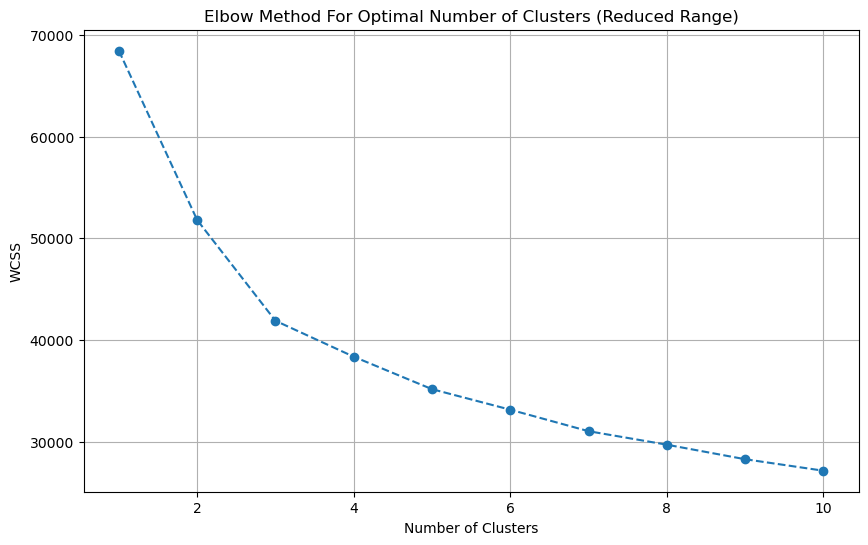

In [171]:
# Plot the results
plt.figure(figsize=(10, 6))
plt.plot(range(1,11), wcss_reduced, marker='o', linestyle='--')
plt.title('Elbow Method For Optimal Number of Clusters (Reduced Range)')
plt.xlabel('Number of Clusters')
plt.ylabel('WCSS')
plt.grid(True)
plt.show()

In [172]:
n_clusters = 3

# Fit the KMeans model
kmeans = KMeans(n_clusters=n_clusters, random_state=42, n_init=10)
kmeans.fit(scaled_data)

# Predict the cluster assignments for each row
cluster_assignments = kmeans.predict(scaled_data)

In [174]:
df = df.iloc[:,:-18]

In [175]:
df["furnishing_type"] = cluster_assignments

In [176]:
df.sample(5)[['furnishDetails','furnishing_type']]

,furnishDetails,furnishing_type
1838,"['4 Fan', '8 Light', 'No AC', 'No Bed', 'No Ch...",1
470,NaN,1
2418,NaN,1
41,"['8 Fan', '1 Exhaust Fan', '4 Geyser', '1 Stov...",0
3567,[],1


## features

In [179]:
df[['society','features']].sample(5)

,society,features
2261,tata primanti,"['Centrally Air Conditioned', 'High Ceiling He..."
817,ss,"['Feng Shui / Vaastu Compliant', 'Security / F..."
2712,shree vardhman victoria,"['Feng Shui / Vaastu Compliant', 'Intercom Fac..."
3607,independent,"['Security / Fire Alarm', 'Private Garden / Te..."
3573,godrej nature plus,"['Security / Fire Alarm', 'Intercom Facility',..."


In [180]:
df.features.isnull().sum()

635

In [187]:
app_df = pd.read_csv(r"datasets\Gurgaon\Sociaties\apartments.csv")
app_df.head(2)

,PropertyName,PropertySubName,NearbyLocations,LocationAdvantages,Link,PriceDetails,TopFacilities
0,Smartworld One DXP,"2, 3, 4 BHK Apartment in Sector 113, Gurgaon","['Bajghera Road', 'Palam Vihar Halt', 'DPSG Pa...","{'Bajghera Road': '800 Meter', 'Palam Vihar Ha...",https://www.99acres.com/smartworld-one-dxp-sec...,"{'2 BHK': {'building_type': 'Apartment', 'area...","['Swimming Pool', 'Salon', 'Restaurant', 'Spa'..."
1,M3M Crown,"3, 4 BHK Apartment in Sector 111, Gurgaon","['DPSG Palam Vihar Gurugram', 'The NorthCap Un...","{'DPSG Palam Vihar Gurugram': '1.4 Km', 'The N...",https://www.99acres.com/m3m-crown-sector-111-g...,"{'3 BHK': {'building_type': 'Apartment', 'area...","['Bowling Alley', 'Mini Theatre', 'Manicured G..."


In [189]:
app_df.PropertyName = app_df.PropertyName.str.lower()

In [193]:
temp_df = df[df.features.isnull()]
temp_df.shape

(635, 26)

In [204]:
x = temp_df.merge(app_df, left_on="society", right_on="PropertyName", how="left")["TopFacilities"]

In [207]:
df.loc[temp_df.index, "features"] = x.values

In [208]:
df.features.isnull().sum()

481

In [209]:
from sklearn.preprocessing import MultiLabelBinarizer
import ast

In [210]:
# Convert the string representation of lists in the 'features' column to actual lists
df['features_list'] = df['features'].apply(lambda x: ast.literal_eval(x) if pd.notnull(x) and x.startswith('[') else [])

# Use MultiLabelBinarizer to convert the features list into a binary matrix
mlb = MultiLabelBinarizer()
features_binary_matrix = mlb.fit_transform(df['features_list'])

# Convert the binary matrix into a DataFrame
features_binary_df = pd.DataFrame(features_binary_matrix, columns=mlb.classes_)

In [211]:
features_binary_df.sample(3)

,24/7 Power Backup,24/7 Water Supply,24x7 Security,ATM,Aerobics Centre,Air Hockey,Airy Rooms,Amphitheatre,Automated Car Wash,Badminton Court,Bank Attached Property,Banquet Hall,Bar/Chill-Out Lounge,Barbecue,Basketball Court,Beach Volley Ball Court,Billiards,Bowling Alley,Bus Shelter,Business Lounge,CCTV Camera Security,Cafeteria,Car Parking,Car wash area,Card Room,Centrally Air Conditioned,Changing Area,Children's Play Area,Cigar Lounge,Clinic,Club House,Club house / Community Center,Community Hall,Concierge Service,Conference room,Creche/Day care,Cricket Pitch,Doctor on Call,Earthquake Resistant,Entrance Lobby,False Ceiling Lighting,Feng Shui / Vaastu Compliant,Fire Fighting Systems,Fitness Centre / GYM,Flower Garden,Food Court,Foosball,Football,Fountain,Gated Community,Gazebo,Golf Course,Grocery Shop,Gymnasium,High Ceiling Height,High Speed Elevators,Infinity Pool,Intercom Facility,Internal Street Lights,Internet/wi-fi connectivity,Jacuzzi,Jogging Track,Landscape Garden,Laundry,Lawn Tennis Court,Library,Lift(s),Lounge,Low Density Society,Maintenance Staff,Manicured Garden,Medical Centre,Milk Booth,Mini Theatre,Multipurpose Court,Multipurpose Hall,Natural Light,Natural Pond,No open drainage around,Park,Party Lawn,Pergola,Piped Gas,Piped-gas,Pool Table,Power Back up Lift,Power Back-up,Private Garden / Terrace,Property Staff,RO System,Rain Water Harvesting,Reading Lounge,Recently Renovated,Reflexology Park,Restaurant,Salon,Sauna,School,Security / Fire Alarm,Security Personnel,Separate entry for servant room,Sewage Treatment Plant,Shopping Centre,Skating Rink,Solar Lighting,Solar Water Heating,Spa,Spacious Interiors,Squash Court,Steam Room,Sun Deck,Swimming Pool,Temple,Terrace Garden,Theatre,Toddler Pool,Valet Parking,Vastu Compliant,Video Door Security,Visitor Parking,Visitors Parking,Volley Ball Court,Waiting Lounge,Waste Disposal,Water Softener Plant,Water Storage,Water purifier,Water softening plant,Wi-Fi Connectivity,Yoga/Meditation Area
365,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
1698,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
1132,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,1,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,1,1,0,0,0,0,0,0,0,0,1,1,0,0,0,1,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,1,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,1,0,1,0,0,0,0


In [212]:
features_binary_df.shape

(3803, 130)

In [213]:
wcss_reduced = []

for i in range(1, 11):
    kmeans = KMeans(n_clusters=i, init='k-means++', random_state=42, n_init=10)
    kmeans.fit(features_binary_df)
    wcss_reduced.append(kmeans.inertia_)

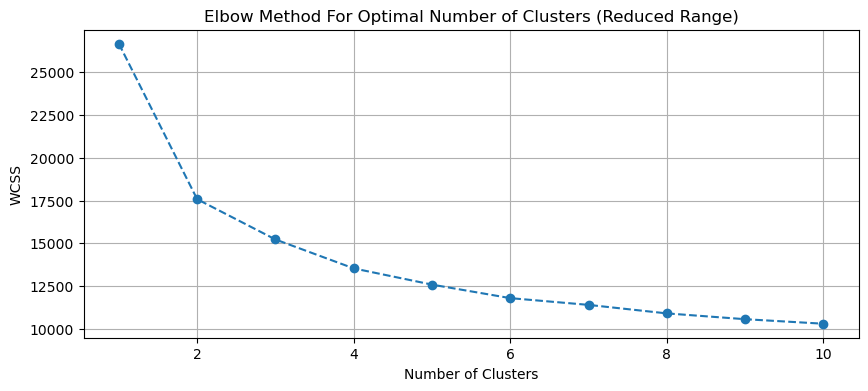

In [216]:
# Plot the results
plt.figure(figsize=(10, 4))
plt.plot(range(1,11), wcss_reduced, marker='o', linestyle='--')
plt.title('Elbow Method For Optimal Number of Clusters (Reduced Range)')
plt.xlabel('Number of Clusters')
plt.ylabel('WCSS')
plt.grid(True)
plt.show()

In [219]:
# Define the weights for each feature as provided
# Assigning weights based on perceived luxury contribution
weights = {
    '24/7 Power Backup': 8,'24/7 Water Supply': 4,'24x7 Security': 7,'ATM': 4,'Aerobics Centre': 6,'Airy Rooms': 8,
    'Amphitheatre': 7,'Badminton Court': 7,'Banquet Hall': 8,'Bar/Chill-Out Lounge': 9,'Barbecue': 7,'Basketball Court': 7,
    'Billiards': 7,'Bowling Alley': 8,'Business Lounge': 9,'CCTV Camera Security': 8,'Cafeteria': 6,'Car Parking': 6,
    'Card Room': 6,'Centrally Air Conditioned': 9,'Changing Area': 6,"Children's Play Area": 7,'Cigar Lounge':9, 'Clinic': 5,
    'Club House': 9,'Concierge Service': 9,'Conference room': 8,'Creche/Day care': 7,'Cricket Pitch': 7,'Doctor on Call': 6,
    'Earthquake Resistant': 5,'Entrance Lobby': 7,'False Ceiling Lighting': 6,'Feng Shui / Vaastu Compliant': 5,
    'Fire Fighting Systems': 8,'Fitness Centre / GYM': 8,'Flower Garden': 7,'Food Court': 6,'Foosball': 5,'Football': 7,
    'Fountain': 7,'Gated Community': 7,'Golf Course': 10,'Grocery Shop': 6,'Gymnasium': 8,'High Ceiling Height': 8,
    'High Speed Elevators': 8,'Infinity Pool': 9,'Intercom Facility': 7,'Internal Street Lights': 6,'Internet/wi-fi connectivity':7,
    'Jacuzzi': 9,'Jogging Track': 7,'Landscape Garden': 8,'Laundry': 6,'Lawn Tennis Court': 8,'Library': 8,'Lounge': 8,
    'Low Density Society': 7,'Maintenance Staff': 6,'Manicured Garden': 7,'Medical Centre': 5,'Milk Booth': 4,'Mini Theatre': 9,
    'Multipurpose Court': 7,'Multipurpose Hall': 7,'Natural Light': 8,'Natural Pond': 7,'Park': 8,'Party Lawn': 8,'Piped Gas': 7,
    'Pool Table': 7,'Power Back up Lift': 8,'Private Garden / Terrace': 9,'Property Staff': 7,'RO System': 7,
    'Rain Water Harvesting': 7,'Reading Lounge': 8,'Restaurant': 8,'Salon': 8,'Sauna': 9,'Security / Fire Alarm': 9,
    'Security Personnel': 9,'Separate entry for servant room': 8,'Sewage Treatment Plant': 6,'Shopping Centre': 7,'Skating Rink': 7,
    'Solar Lighting': 6,'Solar Water Heating': 7,'Spa': 9,'Spacious Interiors': 9,'Squash Court': 8,'Steam Room': 9,'Sun Deck': 8,
    'Swimming Pool': 8,'Temple': 5,'Theatre': 9,'Toddler Pool': 7,'Valet Parking': 9,'Video Door Security': 9,
    'Visitor Parking': 7,'Water Softener Plant': 7,'Water Storage': 7,'Water purifier': 7,'Yoga/Meditation Area': 7
}

In [228]:
# Calculate luxury score for each row
luxury_scores = features_binary_df[list(weights.keys())].multiply(list(weights.values())).sum(axis=1)

In [229]:
df["luxury_scores"] = luxury_scores

In [230]:
df.head()

,property_type,society,sector,price,price_per_sqft,area,areaWithType,bedRoom,bathroom,balcony,additionalRoom,floor_num,facing,agePossession,nearbyLocations,furnishDetails,features,super_built_up_area,built_up_area,carpet_area,study room,servant room,store room,pooja room,others,furnishing_type,features_list,luxury_scores
0,house,malibu towne,sector 47,8.50,53125.0,1600.0,Built Up area: 1600 (148.64 sq.m.),12,12,3+,not available,4.0,North,New Property,"['Standard chartered ATM', 'Icici bank ATM', '...","['12 Wardrobe', '12 Fan', '1 Exhaust Fan', '10...","['Feng Shui / Vaastu Compliant', 'Private Gard...",NaN,1600.0,NaN,0,0,0,0,0,0,"[Feng Shui / Vaastu Compliant, Private Garden ...",99
1,house,international city by sobha phase 1,sector 109,12.00,20000.0,6000.0,Plot area 8000(743.22 sq.m.)Built Up area: 700...,5,6,3,"study room,servant room",2.0,North-East,Relatively New,"['Dwarka sector 21 metro station', 'Pacific D2...","['5 Wardrobe', '10 Fan', '1 Exhaust Fan', '2 G...","['Security / Fire Alarm', 'Feng Shui / Vaastu ...",NaN,7000.0,6000.0,1,1,0,0,0,0,"[Security / Fire Alarm, Feng Shui / Vaastu Com...",154
2,flat,shapoorji pallonji joyville gurugram,sector 102,1.28,10534.0,1215.0,Super Built up area 1215(112.88 sq.m.),2,2,3,not available,10.0,East,Relatively New,"['Khan Market', 'The Esplanade Mall', 'Dwarka ...",NaN,"['Feng Shui / Vaastu Compliant', 'Security / F...",1215.0,NaN,NaN,0,0,0,0,0,1,"[Feng Shui / Vaastu Compliant, Security / Fire...",49
3,flat,conscient habitat,sector 99a,0.27,5599.0,482.0,Carpet area: 484 (44.97 sq.m.),2,2,1,others,8.0,South-West,Relatively New,NaN,NaN,"['Feng Shui / Vaastu Compliant', 'Security / F...",NaN,NaN,484.0,0,0,0,0,1,1,"[Feng Shui / Vaastu Compliant, Security / Fire...",49
4,flat,gls arawali homes,sohna road,0.32,6722.0,476.0,Built Up area: 476 (44.22 sq.m.),2,1,0,not available,0.0,NaN,Undefined,"['Huda City Centre', 'Golf Course Road', 'Delh...","['1 Light', 'No AC', 'No Bed', 'No Chimney', '...",NaN,NaN,476.0,NaN,0,0,0,0,0,1,[],0


In [231]:
# cols to drop -> nearbyLocations,furnishDetails, features,features_list, additionalRoom
df.drop(columns=['nearbyLocations','furnishDetails','features','features_list','additionalRoom'],inplace=True)

In [232]:
df.sample(3)

,property_type,society,sector,price,price_per_sqft,area,areaWithType,bedRoom,bathroom,balcony,floor_num,facing,agePossession,super_built_up_area,built_up_area,carpet_area,study room,servant room,store room,pooja room,others,furnishing_type,luxury_scores
3761,flat,dlf the ultima,sector 81,2.50,11726.0,2132.0,Super Built up area 2132(198.07 sq.m.)Built Up...,3,3,2,4.0,South-East,Relatively New,2132.0,2130.0,2129.0,0,1,0,0,0,2,82
1382,flat,tulip petals,sector 89,1.55,10000.0,1550.0,Super Built up area 1550(144 sq.m.),3,2,3,6.0,East,Moderately Old,1550.0,NaN,NaN,0,0,1,0,0,0,111
1316,flat,m3m heights,sector 65,1.95,16000.0,1219.0,Super Built up area 1261(117.15 sq.m.),2,2,3,16.0,NaN,Under Construction,1261.0,NaN,NaN,0,0,0,0,0,1,44


In [233]:
df.shape

(3803, 23)

In [235]:
df.to_csv("datasets/Gurgaon/Flats/properties_cleaned_v2.csv",index=False)